# Определение перспективного тарифа для телеком-компании

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.  
Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Какие этапы работы были проделаны:**

1. **Изучение данных из файла** - просмотрели общую информацию по таблицам, чтобы понять, с чем работаем
2. **Предобработка данных** - подготовили данные для дальнейшего анализа 
3. **Анализ данных** - провели анализ, где углубились в цифры
4. **Проверка гипотез** - у нас были 2 гипотезы, которые мы проверили
5. **Общий вывод** - составили общий вывод по тарифам и рекомендациям

## Изучение данных из файлов

In [1]:
#Для начала имортируем нужные нам библиотеки для исследования 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
#Теперь можно добавить все датафреймы, которые у нас есть и объявить переменные для каждого
try:
    users = pd.read_csv('/Users/alekseivlasov/Desktop/project/4/users.csv')
except:
    users = pd.read_csv('/datasets/users.csv')
    
try:
    calls = pd.read_csv('/Users/alekseivlasov/Desktop/project/4/calls.csv')
except:
    calls = pd.read_csv('/datasets/calls.csv')
    
try:
    messages = pd.read_csv('/Users/alekseivlasov/Desktop/project/4/messages.csv')
except:
    messages = pd.read_csv('/datasets/messages.csv')    

try:
    internet = pd.read_csv('/Users/alekseivlasov/Desktop/project/4/internet.csv', index_col=0)
except:
    internet = pd.read_csv('/datasets/internet.csv', index_col=0)

try:
    tariffs = pd.read_csv('/Users/alekseivlasov/Desktop/project/4/tariffs.csv')
except:
    tariffs = pd.read_csv('/datasets/tariffs.csv')

Просмотрим общую информацию по каждой таблице  

In [3]:
#Просмотрим таблицу с информацией о пользователях
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


У нас обнаружены пропуски, об этом говорилось в информации о проекте: если значение пропущено, то тариф ещё действовал на момент выгрузки данных. Поэтому, мы пока просто оставим пропуски на месте

В столбцах ``reg_date`` и ``churn_date`` нужно поменять тип данных

In [4]:
#Просмотрим таблицу со звонками
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Пропусков нет, столбцы названы правильно. В ``call_date`` нужно поменять тип данных. 

In [5]:
#Просмотрим таблицу с сообщениями
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Здесь ситуация аналогичная

In [6]:
#Просмотрим таблицу с информацией об интернет-сессиях
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


В датасете ``internet`` также есть столбец, где нужно поменять тип данных ``session_date``

In [7]:
#Просмотрим таблицу с информацией о тарифах
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Пропусков нет, типы данных корректны

### Вывод

В каждой таблице есть столбцы, которым нужно поменять тип данных с ``object`` на ``datetime64``

## Предобработка данных

**Для начала поменяем тип данных в таблицах**

In [8]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')

calls['call_date'] = pd.to_datetime(calls['call_date'], format= '%Y-%m-%d')

messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')

internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')

Перевели столбцы в тип данных ``datetime64``

In [9]:
#Проверим на одной из таблицы, что тип данных поменялся
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


**Теперь проверим датасеты на ошибки и исправим их**

In [10]:
#Посмотрим длительность звонков
calls['duration'].value_counts()

0.00     39613
4.49       142
5.50       142
6.15       141
6.38       141
         ...  
26.94        1
32.19        1
26.32        1
27.41        1
26.90        1
Name: duration, Length: 2871, dtype: int64

У нас есть длительность звонков в минутах, их нужно округлить в большую сторону

In [11]:
calls['duration'] = np.ceil(calls['duration']).astype('int') #округлим в большую сторону и поменяем тип данных

In [12]:
calls['duration'].value_counts().head() #проверим правильность кода

0    39613
7    11510
6    11457
5    11411
8    11272
Name: duration, dtype: int64

Ошибки исправили  

**Для нашего исследования нужно посчитать определенные данные:**

In [13]:
#Добавим столбец с номером месяца
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


Создадим сводную таблицу, где посчитаем для каждого пользователя: количество сделанных звонков и израсходованных минут разговора по месяцам

In [14]:
calls_pivot_table = calls.pivot_table(
    index =['user_id', 'month'], values='duration', aggfunc=['count', 'sum']
).reset_index()

calls_pivot_table = calls_pivot_table.droplevel(1, axis=1) #уберем ненужные столбцы

calls_pivot_table = calls_pivot_table.rename(
    columns ={'count':'calls_count','sum':'calls_sum'}
) #переименуем столбцы

calls_pivot_table.head()

,user_id,month,calls_count,calls_sum
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466


Мы посчитали количество звонков и количество минут по каждому пользователю в месяц

Создадим сводную таблицу по сообщениям и посчитаем количество отправленных сообщений по каждому пользователю  
Для этого, для начала, мы добавим столбец с месяцами

In [15]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [16]:
messages_pivot_table = messages.pivot_table(
    index=['user_id','month'], values='id', aggfunc ='count'
).reset_index()

messages_pivot_table = messages_pivot_table.rename(columns={'id':'messages_count'}) #переименуем столбец

messages_pivot_table.head()

,user_id,month,messages_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


Мы узнали количество отправленных сообщений в месяц по каждому пользователю

Теперь посчитаем объем израсходованного интернет-трафика по месяцам  
Для начала добавим столбец с месяцами и гигабайтами

In [17]:
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
internet['gb_used'] = internet['mb_used']/ 1024
internet.head()

,id,mb_used,session_date,user_id,month,gb_used
0,1000_0,112.95,2018-11-25,1000,11,0.110303
1,1000_1,1052.81,2018-09-07,1000,9,1.028135
2,1000_2,1197.26,2018-06-25,1000,6,1.169199
3,1000_3,550.27,2018-08-22,1000,8,0.537373
4,1000_4,302.56,2018-09-24,1000,9,0.295469


In [18]:
#Создадим сводную таблицу
internet_pivot_table = internet.pivot_table(
    index=['user_id', 'month'], values='gb_used', aggfunc='sum'
).reset_index()

internet_pivot_table.head()

,user_id,month,gb_used
0,1000,5,2.200674
1,1000,6,22.689229
2,1000,7,13.675430
3,1000,8,13.726494
4,1000,9,14.227451


Нам нужно округлить объем трафика в большую сторону

In [19]:
internet_pivot_table = np.ceil(internet_pivot_table).astype('int')
internet_pivot_table.head()

,user_id,month,gb_used
0,1000,5,3
1,1000,6,23
2,1000,7,14
3,1000,8,14
4,1000,9,15


**Объединим сводные таблицы**

In [20]:
df_pivot = calls_pivot_table.merge(messages_pivot_table, on=['user_id', 'month'], how='outer')

df_pivot = df_pivot.merge(internet_pivot_table, on=['user_id', 'month'], how='outer')

df_pivot.head()

,user_id,month,calls_count,calls_sum,messages_count,gb_used
0,1000,5,22.0,159.0,22.0,3.0
1,1000,6,43.0,172.0,60.0,23.0
2,1000,7,47.0,340.0,75.0,14.0
3,1000,8,52.0,408.0,81.0,14.0
4,1000,9,58.0,466.0,57.0,15.0


Добавим тариф для каждого пользователя

In [21]:
df_pivot = df_pivot.merge(users, on='user_id', how='outer')

#Удалим столбцы, которые не потребуются для исследования
df_pivot = df_pivot.drop(
    columns=['age', 'churn_date', 'city', 'first_name', 'last_name', 'reg_date'], axis=1
)

df_pivot.head()

,user_id,month,calls_count,calls_sum,messages_count,gb_used,tariff
0,1000,5.0,22.0,159.0,22.0,3.0,ultra
1,1000,6.0,43.0,172.0,60.0,23.0,ultra
2,1000,7.0,47.0,340.0,75.0,14.0,ultra
3,1000,8.0,52.0,408.0,81.0,14.0,ultra
4,1000,9.0,58.0,466.0,57.0,15.0,ultra


In [22]:
df_pivot = df_pivot.rename(columns={'tariff':'tariff_name'}) #переименуем столбец

In [23]:
#Объединим таблицы для дальнейшего исследования 
df_pivot = df_pivot.merge(tariffs, on='tariff_name', how='outer')
df_pivot.head()

,user_id,month,calls_count,calls_sum,messages_count,gb_used,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,22.0,159.0,22.0,3.0,ultra,1000,30720,3000,1950,150,1,1
1,1000,6.0,43.0,172.0,60.0,23.0,ultra,1000,30720,3000,1950,150,1,1
2,1000,7.0,47.0,340.0,75.0,14.0,ultra,1000,30720,3000,1950,150,1,1
3,1000,8.0,52.0,408.0,81.0,14.0,ultra,1000,30720,3000,1950,150,1,1
4,1000,9.0,58.0,466.0,57.0,15.0,ultra,1000,30720,3000,1950,150,1,1


У нас есть пропуски, которые мы заменим на специальный символ ``0``

In [24]:
df_pivot = df_pivot.fillna(value=0) #заменим пропуски

Отлично! Мы подготовили сводные таблицы для дальнейших расчетов

In [25]:
#Нам нужно посчитать, сколько минут пользователь проговорил сверх тарифа
df_pivot['calls_overrun'] = df_pivot['calls_sum'] - df_pivot['minutes_included']

#Посчитаем количество отправленных сообщений сверх тарифа
df_pivot['messages_overrun'] = df_pivot['messages_count'] - df_pivot['messages_included']

Для того, чтобы посчитать, не вышел ли пользователь за пределы тарифа - нужно добавить столбец, где мы переведем ``mb_per_month_included`` в ``gb_per_month_included``

In [26]:
df_pivot['gb_per_month_included'] = df_pivot['mb_per_month_included']/1024
df_pivot['gb_per_month_included'] = df_pivot['gb_per_month_included'].astype('int')

In [27]:
#Теперь можем посчитать, на сколько превысил тариф пользователь
df_pivot['gb_overrun'] = df_pivot['gb_used'] - df_pivot['gb_per_month_included']

Нам нужно посчитать помесячную выручку по каждому пользвателю. Для этого создадим функцию

In [28]:
def get_revenue(row):
    revenue_by_min = 0
    revenue_by_messages = 0
    revenue_gb = 0
    
    if row['calls_overrun'] > 0:
        revenue_by_min = row['calls_overrun'] * row['rub_per_minute']
    if row['messages_overrun'] > 0:
        revenue_by_messages = row['messages_overrun'] * row['rub_per_message']
    if row['gb_overrun'] > 0:
        revenue_gb = row['gb_overrun'] * row['rub_per_gb']
    return revenue_by_min + revenue_by_messages + revenue_gb + row['rub_monthly_fee']

df_pivot['revenue'] = df_pivot.apply(get_revenue, axis=1)

df_pivot.head()

,user_id,month,calls_count,calls_sum,messages_count,gb_used,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,calls_overrun,messages_overrun,gb_per_month_included,gb_overrun,revenue
0,1000,5.0,22.0,159.0,22.0,3.0,ultra,1000,30720,3000,1950,150,1,1,-2841.0,-978.0,30,-27.0,1950.0
1,1000,6.0,43.0,172.0,60.0,23.0,ultra,1000,30720,3000,1950,150,1,1,-2828.0,-940.0,30,-7.0,1950.0
2,1000,7.0,47.0,340.0,75.0,14.0,ultra,1000,30720,3000,1950,150,1,1,-2660.0,-925.0,30,-16.0,1950.0
3,1000,8.0,52.0,408.0,81.0,14.0,ultra,1000,30720,3000,1950,150,1,1,-2592.0,-919.0,30,-16.0,1950.0
4,1000,9.0,58.0,466.0,57.0,15.0,ultra,1000,30720,3000,1950,150,1,1,-2534.0,-943.0,30,-15.0,1950.0


Мы произвели расчеты по каждому пользвателю и теперь знаем, сколько он приносит денег в компанию каждый месяц

Для исследования нам понадобится столбец с городами

In [29]:
df_pivot = df_pivot.merge(users, on='user_id', how='outer')

In [30]:
#Удалим ненужные столбцы
df_pivot = df_pivot.drop(columns=['age', 'churn_date', 'first_name', 'last_name', 'reg_date', 'tariff'])

In [31]:
df_pivot.head()

,user_id,month,calls_count,calls_sum,messages_count,gb_used,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,calls_overrun,messages_overrun,gb_per_month_included,gb_overrun,revenue,city
0,1000,5.0,22.0,159.0,22.0,3.0,ultra,1000,30720,3000,1950,150,1,1,-2841.0,-978.0,30,-27.0,1950.0,Краснодар
1,1000,6.0,43.0,172.0,60.0,23.0,ultra,1000,30720,3000,1950,150,1,1,-2828.0,-940.0,30,-7.0,1950.0,Краснодар
2,1000,7.0,47.0,340.0,75.0,14.0,ultra,1000,30720,3000,1950,150,1,1,-2660.0,-925.0,30,-16.0,1950.0,Краснодар
3,1000,8.0,52.0,408.0,81.0,14.0,ultra,1000,30720,3000,1950,150,1,1,-2592.0,-919.0,30,-16.0,1950.0,Краснодар
4,1000,9.0,58.0,466.0,57.0,15.0,ultra,1000,30720,3000,1950,150,1,1,-2534.0,-943.0,30,-15.0,1950.0,Краснодар


Поменям тип данных на ``int``

In [32]:
#Создадим функцию, чтобы поменять тип данных
def type_df(row):
    df_pivot[row] = df_pivot[row].astype('int')
    
df_pivot_list = ['month', 'calls_count', 'calls_sum', 'messages_count', 
                 'gb_used', 'calls_overrun', 'messages_overrun', 'gb_overrun', 'revenue'] 

type_df(df_pivot_list)

df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   user_id                3216 non-null   int64 
 1   month                  3216 non-null   int64 
 2   calls_count            3216 non-null   int64 
 3   calls_sum              3216 non-null   int64 
 4   messages_count         3216 non-null   int64 
 5   gb_used                3216 non-null   int64 
 6   tariff_name            3216 non-null   object
 7   messages_included      3216 non-null   int64 
 8   mb_per_month_included  3216 non-null   int64 
 9   minutes_included       3216 non-null   int64 
 10  rub_monthly_fee        3216 non-null   int64 
 11  rub_per_gb             3216 non-null   int64 
 12  rub_per_message        3216 non-null   int64 
 13  rub_per_minute         3216 non-null   int64 
 14  calls_overrun          3216 non-null   int64 
 15  messages_overrun     

Таблица готова для анализа

## Анализ данных

**Выведем общую информацию по прибыли от каждого пользователя**

In [33]:
df_pivot['revenue'].describe()

count    3216.000000
mean     1528.902674
std       798.224060
min       550.000000
25%       750.000000
50%      1653.500000
75%      1950.000000
max      6770.000000
Name: revenue, dtype: float64

В среднем пользователи тратят на связь 1528 руб. в месяц, минимум - это как раз тариф "Смарт" или 550 руб., а максимум 6770 руб. (кто-то любит поговорить)  
Медианное значение близко к среднему - 1653 руб., величина стандартного отклонения - 798 руб., что говорит о том, что поведение одних пользователей сильно отличается от других  
Также найдем дисперсию 

In [34]:
print('Дисперсия прибыли равна:', np.var(df_pivot['revenue'])) #найдем дисперсию

Дисперсия прибыли равна: 636963.528152053


Разделим пользователей по тарифам, и посмотрим, как поменялась картинка по прибыли

In [35]:
#Объявим переменные 
df_ultra = df_pivot.query('tariff_name == "ultra"') 
df_smart = df_pivot.query('tariff_name == "smart"')

In [36]:
print(df_ultra['revenue'].describe())
print()
print(df_smart['revenue'].describe())

count     986.000000
mean     2070.030426
std       376.015578
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: revenue, dtype: float64

count    2230.000000
mean     1289.641704
std       818.370799
min       550.000000
25%       550.000000
50%      1021.000000
75%      1750.000000
max      6770.000000
Name: revenue, dtype: float64


In [37]:
#Посчитаем дисперсии
print('Дисперсия тарифа Ultra:', np.var(df_ultra['revenue']))
print()
print('Дисперсия тарифа Smart:', np.var(df_smart['revenue']))

Дисперсия тарифа Ultra: 141244.31956107615

Дисперсия тарифа Smart: 669430.4361979931


У тарифа "Ультра" больше среднее и медианное значение. Это связано с тем, что сам тариф стоит дороже и минимальный чек у него 1950 руб., что сильно, почти в 4 раза, отличается от тарифа "Смарт"

По выборке мы видим, что больше пользователей подключены на тарифе "Смарт"

Стандартное отклонение больше у тарифа "Смарт", видимо на этом тарифе чаще происходят непредвиденные траты, что дает подтверждение максимальное значение 6770 руб. и Квартили, которые в тарифе "Ультра" одинаковые, а в тарифе "Смарт" уже разные

Дисперсия также больше у тарифа "Смарт"

**Сравнение тарифов "Ультра" и "Смарт"**

Опишем поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитаем среднее количество, дисперсию и стандартное отклонение.

In [38]:
data_agg = df_pivot.pivot_table(
    index=['tariff_name'], 
    values= ['calls_sum', 'messages_count', 'gb_used', 'revenue'], 
    aggfunc=['mean', 'var', 'std']
)

# устраним двухэтажные названия
data_agg.columns = ['call_mean', 'messages_mean', 'internet_mean', 'payment_mean',
                      'call_var', 'messages_var', 'internet_var', 'payment_var',
                      'call_std', 'messages_std', 'internet_std', 'payment_std']
data_agg = data_agg.reset_index().round(2)
data_agg

,tariff_name,call_mean,messages_mean,internet_mean,payment_mean,call_var,messages_var,internet_var,payment_var,call_std,messages_std,internet_std,payment_std
0,smart,417.75,16.32,33.37,1289.64,36281.39,33.13,796.96,669730.76,190.48,5.76,28.23,818.37
1,ultra,526.09,19.47,49.31,2070.03,101052.49,97.38,2285.42,141387.71,317.89,9.87,47.81,376.02


### Графики

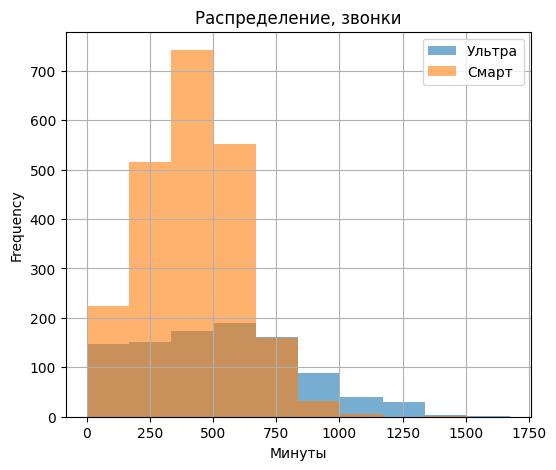

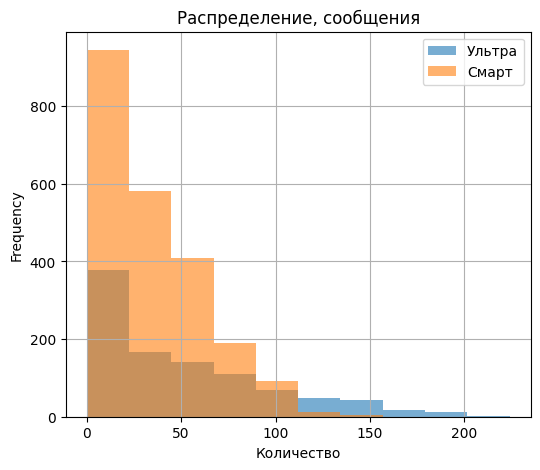

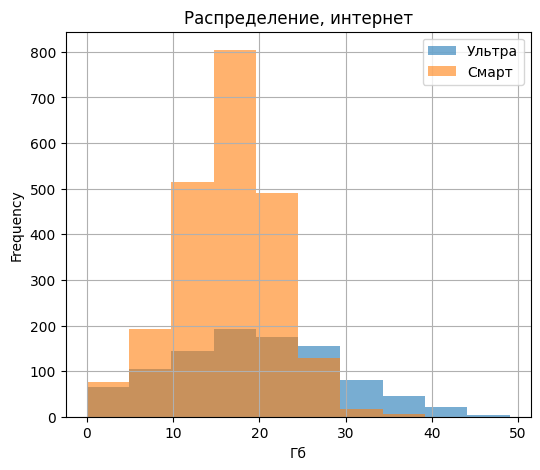

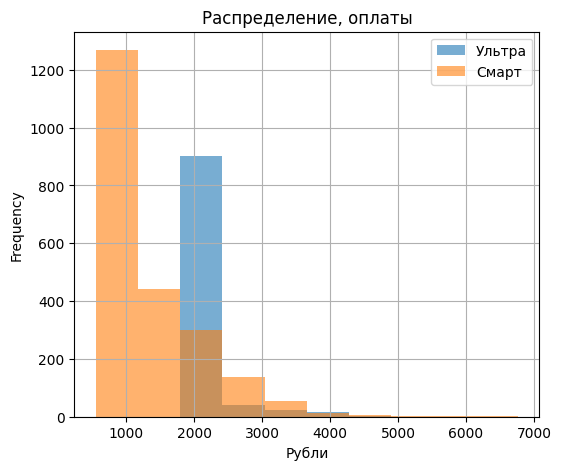

In [39]:
#Построим гистограму по звонкам
calls=pd.DataFrame({
    'Ультра':df_ultra['calls_sum'],
    'Смарт':df_smart['calls_sum']
})
calls.plot(kind= 'hist', bins=10, grid=True, figsize=(6,5), alpha=0.6)
plt.title('Распределение, звонки')
plt.xlabel('Минуты')

#Построим гистограму по сообщениям
messages=pd.DataFrame({
    'Ультра':df_ultra['messages_count'],
    'Смарт':df_smart['messages_count']
})
messages.plot(kind='hist', bins=10, grid=True, figsize=(6,5), alpha=0.6)
plt.title('Распределение, сообщения')
plt.xlabel('Количество')

#Построим гистограму по интернет-трафику
internet=pd.DataFrame({
    'Ультра':df_ultra['gb_used'],
    'Смарт':df_smart['gb_used']
})
internet.plot(kind='hist', bins=10, grid=True, figsize=(6,5), alpha=0.6)
plt.title('Распределение, интернет')
plt.xlabel('Гб')

#Посмтоим гистограму по оплате
revenue=pd.DataFrame({
    'Ультра':df_ultra['revenue'],
    'Смарт':df_smart['revenue']
})
revenue.plot(kind='hist', bins=10, grid=True, figsize=(6,5), alpha=0.6)
plt.title('Распределение, оплаты')
plt.xlabel('Рубли');

**Выводы:**

* Звонки - распределения смещены влево;
* Сообщения - распределения смещены вправо;
* Интернет - распределения смщены вправо;
* Оплата - распределения смещены вправо.

### Вывод по тарифам


*В абонентскую плату тарифа "Ультра" включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика*.    
Пользователи тарифа "Ультра" укладываются в лимиты, определенные абонентской платой. Максимально тратят 1500 минут разговора, 220 сообщений, до 40 ГБ трафика.


*В абонентскую плату тарифа "Смарт" включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика*.   
Пользователи тарифа "Смарт" не всегда укладываются в лимиты. Приличная часть клиентов тратит от 500 до 1000 минут. Также часть клиентов не укладывается в лимит по СМС и тратит 50-100 сообщений. И почти половина клиентов превышает лимит по интернету свыше 15 -30 Гб.

Исходя из выборки, поведение пользователей следующее:
* Пользователи тарифа «Смарт» не укладываются в абонентскую плату и приносят дополнительную выручку компании. 
* Пользователи тарифа «Ультра» укладываются в абонентскую плату и не приносят компании дополнительную выручку. Но сама оплата тарифа больше, чем "Смарт"

## Проверка гипотез

Проверим первую гипотезу, она звучит так: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

**Сформулируем нулевую гипотезу:** Средняя выручка пользователей тарифа "Смарт" равна средней выручке тарифа "Ультра"  
**Сформулируем альтернативную гипотезу:** Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

In [40]:
#проведем т-тест
ultra_pay = df_pivot.query('tariff_name == "ultra"')['revenue']
smart_pay = df_pivot.query('tariff_name == "smart"')['revenue']

alpha = 0.05 #критический уровень статистической значимости
results = st.ttest_ind(
    ultra_pay, smart_pay, equal_var=False
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.927011394420941e-250
Отвергаем нулевую гипотезу


По данному тесту мы не отвергаем гипотезу, которая была на проверке: "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются"

Проверим следующую гипотезу: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

**Сформулируем Н0:** Средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов   
**Сформулируем Н1:** Средняя выручка пользователей из Москвы отличается от средней выручки пользователей из других регионов

In [41]:
#Также проведем т-тест
moscow_pay = df_pivot.query('city == "Москва"')['revenue']
region_pay = df_pivot.query('city != "Москва"')['revenue']

aplha = 0.05 #критический уровень статистической значимости
results = st.ttest_ind(
    moscow_pay, region_pay, equal_var=False
)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5216952110000278
Не получилось отвергнуть нулевую гипотезу


Здесь вероятность ошибки при отклонении нулевой гипотезы 52%

Гипотезу от том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов мы отвергаем

### вывод

1. Критерий *alpha = 0,05* был задан исходя из общепринятых порговых значений (5% и 1%).   
   
2. Нулевая и альтернативная гипотезы сформулированы исходя из:
     - нулевая гипотеза всегда формулируется так, чтобы использовать знак равенства;
     - альтернативная гипотеза была сформулирована с учетом того, что нас интересует какой тариф лучше

## Общий вывод

Проанализировав поведение клиентов, можно сделать вывод, что для компании выгоднее тариф "Смарт". Пользователи охотнее подключаются на более дешевый тариф, при этом, пользователь редко укладывается в лимиты и платит больше

In [42]:
#Посмотрим суммарную выручку по двум тарифами за 2018 год
print('Суммарная выручка за 2018 год по тарифу Смарт:', smart_pay.sum(), 'руб.')
print('Суммарная выручка за 2018 год по тарифу Ультра:', ultra_pay.sum(), 'руб.')

Суммарная выручка за 2018 год по тарифу Смарт: 2875901 руб.
Суммарная выручка за 2018 год по тарифу Ультра: 2041050 руб.


При этом следует учесть, что пользователей по тарифу "Смарт" больше, чем пользователей по тарифу "Ультра". Поэтому логично, что выручка больше.

Так же существует вероятность, что часто пользователи тарифа "Смарт" не укладываются в абонентскую плату, как следствие - платят больше, чем рассчитывали. Поэтому они могут начать уходить на более вгодные предложения.